# Baseline Model with Multilayer Perceptrons

In [195]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [184]:
seed = 7
numpy.random.seed(seed)

##### Loading Dataset

In [185]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##### Flatten Every Image

In [186]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [187]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


##### Normalizing

In [188]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

##### one-hot-encoding

In [189]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

##### Model

In [190]:
#define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer= 'normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [191]:
# build the model
model = baseline_model()

##### Fit Model

In [192]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2845 - accuracy: 0.9191 - val_loss: 0.1406 - val_accuracy: 0.9579
Epoch 2/10
 - 4s - loss: 0.1123 - accuracy: 0.9676 - val_loss: 0.0933 - val_accuracy: 0.9724
Epoch 3/10
 - 4s - loss: 0.0726 - accuracy: 0.9792 - val_loss: 0.0802 - val_accuracy: 0.9769
Epoch 4/10
 - 4s - loss: 0.0511 - accuracy: 0.9853 - val_loss: 0.0739 - val_accuracy: 0.9776
Epoch 5/10
 - 4s - loss: 0.0378 - accuracy: 0.9893 - val_loss: 0.0659 - val_accuracy: 0.9805
Epoch 6/10
 - 4s - loss: 0.0273 - accuracy: 0.9927 - val_loss: 0.0655 - val_accuracy: 0.9804
Epoch 7/10
 - 4s - loss: 0.0213 - accuracy: 0.9946 - val_loss: 0.0619 - val_accuracy: 0.9812
Epoch 8/10
 - 4s - loss: 0.0144 - accuracy: 0.9969 - val_loss: 0.0646 - val_accuracy: 0.9804
Epoch 9/10
 - 4s - loss: 0.0110 - accuracy: 0.9977 - val_loss: 0.0582 - val_accuracy: 0.9820
Epoch 10/10
 - 4s - loss: 0.0083 - accuracy: 0.9985 - val_loss: 0.0595 - val_accuracy: 0.9822


##### Evaluate Model

In [193]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.78%


##### visualize accuracy and loss

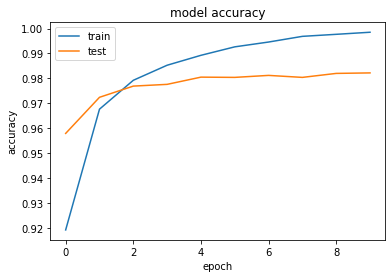

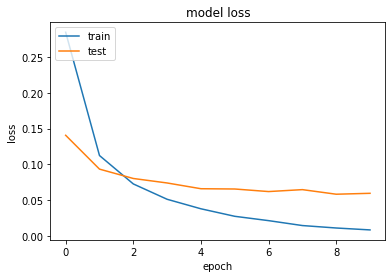

In [196]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Simple Convolutional Neural Network for MNIST

In [197]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


In [198]:
seed = 7
numpy.random.seed(seed)


##### Loading Dataset

In [199]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


##### Reshape data

In [200]:
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')


In [201]:
#X_train.shape[0]

##### normalize data

In [202]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


##### one-hot-encoding

In [203]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


##### Model

In [204]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model


In [205]:
# build the model
model = baseline_model()


##### Fit Model

In [206]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 20s - loss: 0.2477 - accuracy: 0.9305 - val_loss: 0.0833 - val_accuracy: 0.9749
Epoch 2/10
 - 20s - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.0469 - val_accuracy: 0.9859
Epoch 3/10
 - 20s - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0415 - val_accuracy: 0.9866
Epoch 4/10
 - 19s - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0404 - val_accuracy: 0.9878
Epoch 5/10
 - 20s - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0360 - val_accuracy: 0.9884
Epoch 6/10
 - 20s - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0318 - val_accuracy: 0.9897
Epoch 7/10
 - 20s - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0319 - val_accuracy: 0.9897
Epoch 8/10
 - 19s - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 9/10
 - 19s - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 10/10
 - 20s - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0319 - val_accuracy: 0.9905


##### Evaluate Model

In [207]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


CNN Error: 0.95%


##### visualize accuracy and loss

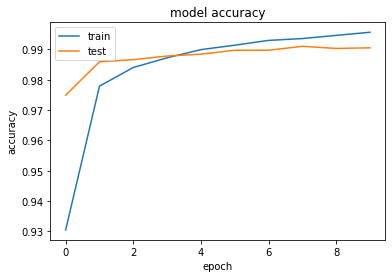

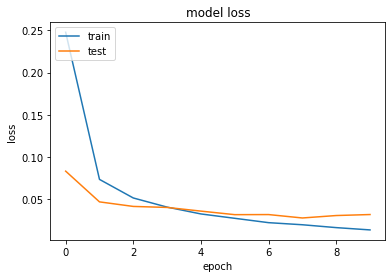

In [208]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Larger Convolutional Neural Network for MNIST

In [209]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#K.set_image_dim_ordering('th')


In [210]:
seed = 7
numpy.random.seed(seed)

##### Data Loading

In [211]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##### Data Reshape

In [212]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

##### Data Normalizing

In [213]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

##### one-hot-encoding

In [214]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

##### Model

In [215]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [216]:
# build the model
model = larger_model()

##### Fit Model

In [217]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 22s - loss: 0.3724 - accuracy: 0.8872 - val_loss: 0.0859 - val_accuracy: 0.9740
Epoch 2/10
 - 22s - loss: 0.1007 - accuracy: 0.9687 - val_loss: 0.0570 - val_accuracy: 0.9816
Epoch 3/10
 - 24s - loss: 0.0748 - accuracy: 0.9766 - val_loss: 0.0456 - val_accuracy: 0.9847
Epoch 4/10
 - 25s - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 5/10
 - 25s - loss: 0.0515 - accuracy: 0.9835 - val_loss: 0.0324 - val_accuracy: 0.9887
Epoch 6/10
 - 23s - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.0329 - val_accuracy: 0.9880
Epoch 7/10
 - 24s - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0303 - val_accuracy: 0.9898
Epoch 8/10
 - 27s - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0271 - val_accuracy: 0.9906
Epoch 9/10
 - 26s - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0267 - val_accuracy: 0.9914
Epoch 10/10
 - 26s - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0267 - val_accuracy: 0.9905


##### Evaluation of the Model

In [218]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.95%


##### visualize accuracy and loss

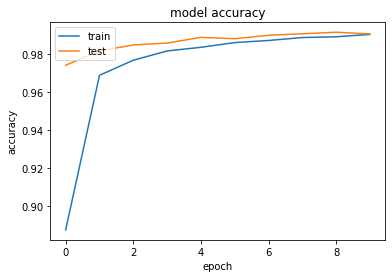

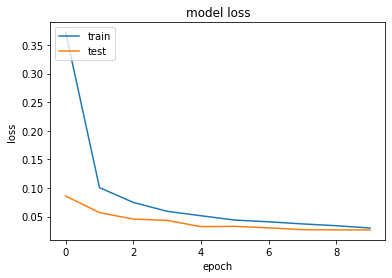

In [219]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
